In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from matplotlib import rcParams
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

FIGSIZE = 20, 10

In [2]:
df_tv = pd.read_csv('data/train.csv', index_col='PassengerId')
df_tt = pd.read_csv('data/test.csv', index_col='PassengerId')

df_tv.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df_tv.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_tv.Pclass = df_tv.Pclass.map({1: '1st', 2: '2nd', 3: '3rd'})
df_tt.Pclass = df_tt.Pclass.map({1: '1st', 2: '2nd', 3: '3rd'})
df_tv.drop('Ticket', axis=1, inplace=True)
df_tt.drop('Ticket', axis=1, inplace=True)

In [5]:
df_tv.describe(include='number')

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_tv.describe(exclude='number')

,Pclass,Name,Sex,Cabin,Embarked
count,891,891,891,204,889
unique,3,891,2,147,3
top,3rd,"Braund, Mr. Owen Harris",male,B96 B98,S
freq,491,1,577,4,644


In [7]:
print(df_tv.isna().sum())
print('*' * 50)
print(df_tt.isna().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
**************************************************
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [8]:
df_tv.mode().iloc[0]

Survived                    0.0
Pclass                      3rd
Name        Abbing, Mr. Anthony
Sex                        male
Age                        24.0
SibSp                       0.0
Parch                       0.0
Fare                       8.05
Cabin                   B96 B98
Embarked                      S
Name: 0, dtype: object

In [9]:
df_tv.Cabin = df_tv.Cabin.apply(lambda x: np.nan if x is np.nan else x[0])
df_tt.Cabin = df_tt.Cabin.apply(lambda x: np.nan if x is np.nan else x[0])

df_tv['Title'] = df_tv.Name.apply(lambda x: x.split(', ')[1].split()[0][:-1])
df_tt['Title'] = df_tt.Name.apply(lambda x: x.split(', ')[1].split()[0][:-1])

df_tv.Title = df_tv.Title.apply(lambda x: x if x in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Others')
df_tt.Title = df_tt.Title.apply(lambda x: x if x in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Others')

df_tv.drop('Name', axis=1, inplace=True)
df_tt.drop('Name', axis=1, inplace=True)

In [10]:
df_tv.fillna(df_tv.mode().iloc[0], inplace=True)
df_tt.fillna(df_tv.mode().iloc[0], inplace=True)

In [11]:
df_tv['Family_Size'] = df_tv.SibSp + df_tv.Parch + 1
df_tt['Family_Size'] = df_tt.SibSp + df_tt.Parch + 1

df_tv.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df_tt.drop(['SibSp', 'Parch'], axis=1, inplace=True)

<Figure size 1440x720 with 0 Axes>

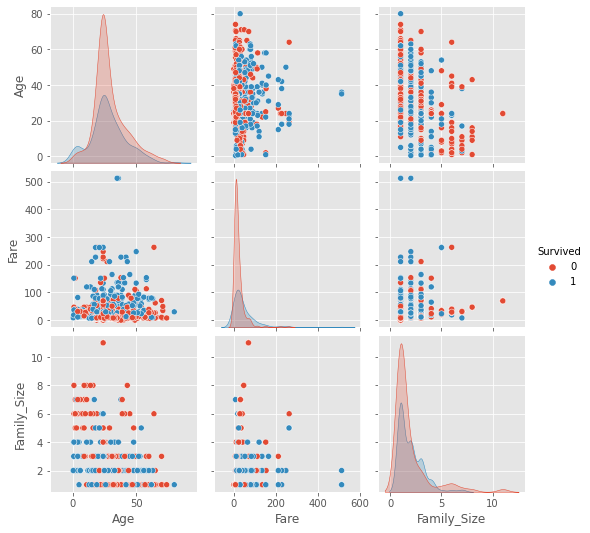

In [12]:
plt.figure(figsize=FIGSIZE)
sns.pairplot(df_tv, diag_kind='kde', hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Count'>

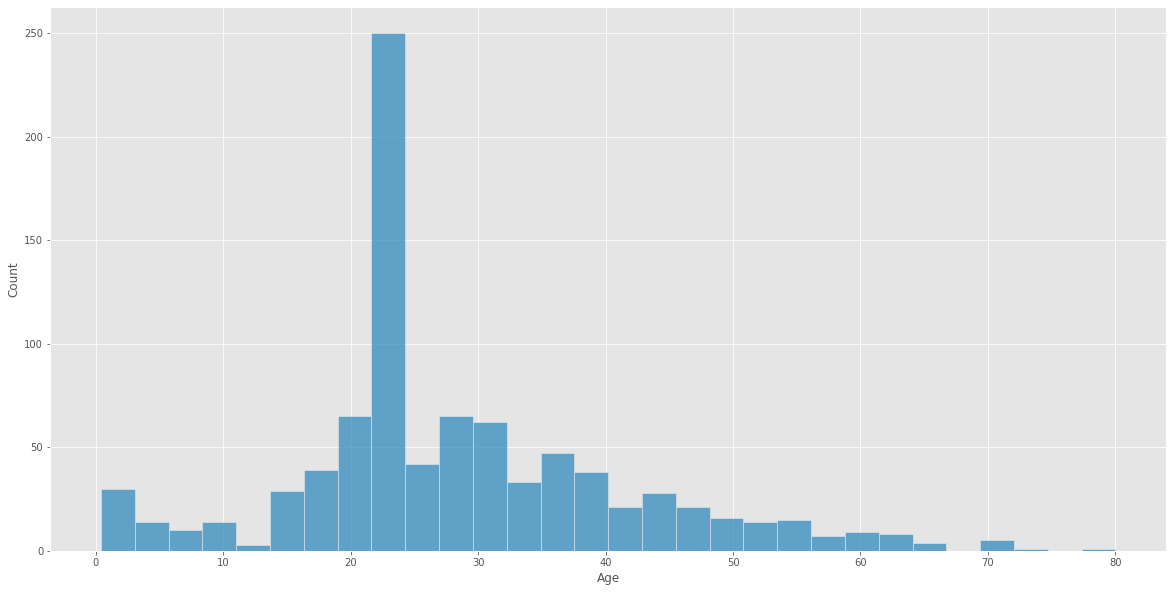

In [13]:
plt.figure(figsize=FIGSIZE)
sns.histplot(data=df_tv, x='Age')

In [14]:
df_tv['Age_Group'] = pd.cut(df_tv.Age, labels=['kid', 'teen', 'adult', 'elder'], bins=[-np.inf, 10, 20, 40, np.inf])
df_tt['Age_Group'] = pd.cut(df_tt.Age, labels=['kid', 'teen', 'adult', 'elder'], bins=[-np.inf, 10, 20, 40, np.inf])
df_tv.drop('Age', axis=1, inplace=True)
df_tt.drop('Age', axis=1, inplace=True)
df_tv.head()


,Survived,Pclass,Sex,Fare,Cabin,Embarked,Title,Family_Size,Age_Group
PassengerId,,,,,,,,,
1,0,3rd,male,7.2500,C,S,Mr,2,adult
2,1,1st,female,71.2833,C,C,Mrs,2,adult
3,1,3rd,female,7.9250,C,S,Miss,1,adult
4,1,1st,female,53.1000,C,S,Mrs,2,adult
5,0,3rd,male,8.0500,C,S,Mr,1,adult


In [16]:
df_tv[df_tv.Fare <= 0].head()

,Survived,Pclass,Sex,Fare,Cabin,Embarked,Title,Family_Size,Age_Group
PassengerId,,,,,,,,,
180,0,3rd,male,0.0,C,S,Mr,1,adult
264,0,1st,male,0.0,B,S,Mr,1,adult
272,1,3rd,male,0.0,C,S,Mr,1,adult
278,0,2nd,male,0.0,C,S,Mr,1,adult
303,0,3rd,male,0.0,C,S,Mr,1,teen


In [17]:
fillable_fare = df_tv[(df_tv.Fare > 0) & (df_tv.Sex == 'male') & (df_tv.Embarked == 'S') & (df_tv.Title == 'Mr') & (df_tv.Family_Size == 1) & (df_tv.Age_Group == 'adult')].Fare.median()
fillable_fare

8.05

In [18]:
df_tv.Fare = df_tv.Fare.apply(lambda x: x if x > 0 else fillable_fare)
df_tt.Fare = df_tt.Fare.apply(lambda x: x if x > 0 else fillable_fare)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

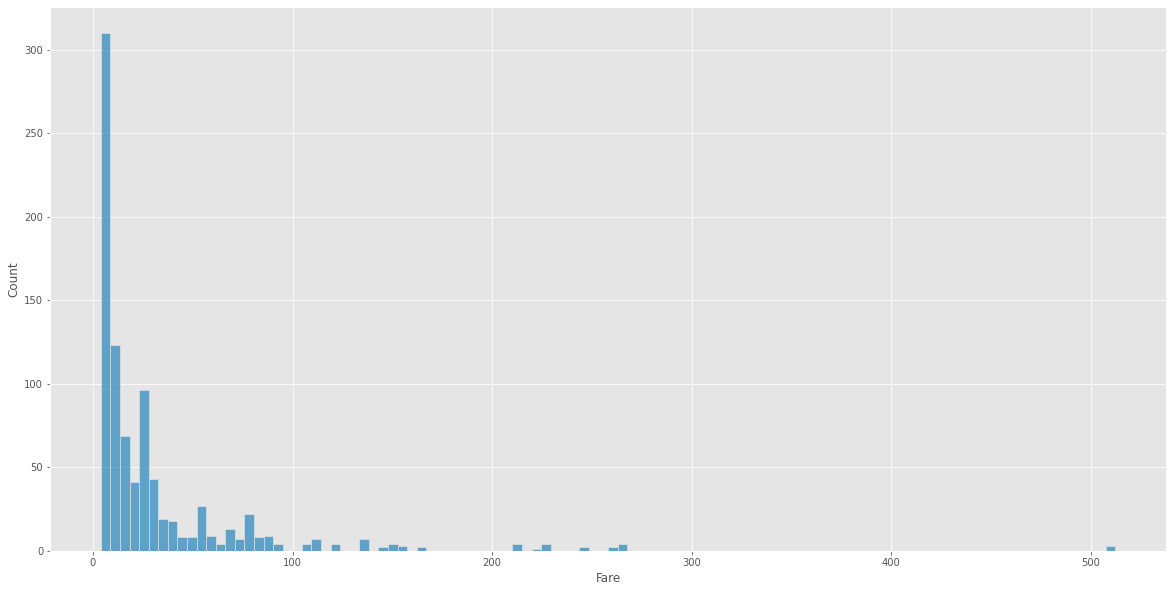

In [19]:
plt.figure(figsize=FIGSIZE)
sns.histplot(data=df_tv, x='Fare')

In [22]:
df_tv[df_tv.Fare > 300].head()

,Survived,Pclass,Sex,Fare,Cabin,Embarked,Title,Family_Size,Age_Group
PassengerId,,,,,,,,,
259,1,1st,female,512.3292,C,C,Miss,1,adult
680,1,1st,male,512.3292,B,C,Mr,2,adult
738,1,1st,male,512.3292,B,C,Mr,1,adult


In [23]:
fillable_fare = df_tv[(df_tv.Fare < 300) & (df_tv.Pclass == '1st') & (df_tv.Embarked == 'C') & (df_tv.Age_Group == 'adult')].Fare.median()
fillable_fare

76.51045

In [24]:
df_tv.Fare = df_tv.Fare.apply(lambda x: x if x < 300 else fillable_fare)
df_tt.Fare = df_tt.Fare.apply(lambda x: x if x < 300 else fillable_fare)

In [25]:
df_tv.Fare = pd.cut(df_tv.Fare, bins=[-np.inf, 25, 100, 175, np.inf], labels=['low', 'medium', 'high', 'v_high'])
df_tt.Fare = pd.cut(df_tt.Fare, bins=[-np.inf, 25, 100, 175, np.inf], labels=['low', 'medium', 'high', 'v_high'])

In [26]:
df_tv.head()

,Survived,Pclass,Sex,Fare,Cabin,Embarked,Title,Family_Size,Age_Group
PassengerId,,,,,,,,,
1,0,3rd,male,low,C,S,Mr,2,adult
2,1,1st,female,medium,C,C,Mrs,2,adult
3,1,3rd,female,low,C,S,Miss,1,adult
4,1,1st,female,medium,C,S,Mrs,2,adult
5,0,3rd,male,low,C,S,Mr,1,adult


<AxesSubplot:xlabel='count', ylabel='Family_Size'>

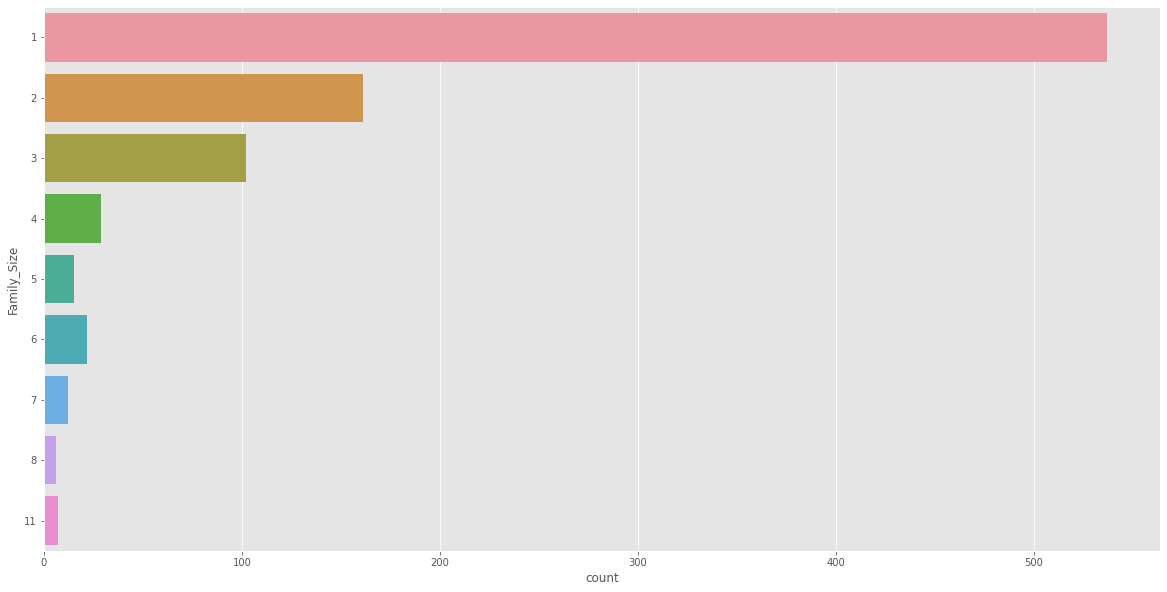

In [27]:
plt.figure(figsize=FIGSIZE)
sns.countplot(data=df_tv, y='Family_Size')

In [28]:
df_tv.Family_Size = pd.cut(df_tv.Family_Size, bins=[-np.inf, 2, 4, 7, np.inf], labels=['alone', 'small', 'medium', 'large'])
df_tt.Family_Size = pd.cut(df_tt.Family_Size, bins=[-np.inf, 2, 4, 7, np.inf], labels=['alone', 'small', 'medium', 'large'])

In [29]:
df_tv.head(10)

,Survived,Pclass,Sex,Fare,Cabin,Embarked,Title,Family_Size,Age_Group
PassengerId,,,,,,,,,
1,0,3rd,male,low,C,S,Mr,alone,adult
2,1,1st,female,medium,C,C,Mrs,alone,adult
3,1,3rd,female,low,C,S,Miss,alone,adult
4,1,1st,female,medium,C,S,Mrs,alone,adult
5,0,3rd,male,low,C,S,Mr,alone,adult
6,0,3rd,male,low,C,Q,Mr,alone,adult
7,0,1st,male,medium,E,S,Mr,alone,elder
8,0,3rd,male,low,C,S,Master,medium,kid
9,1,3rd,female,low,C,S,Mrs,small,adult


In [30]:
df_tt.head(10)

,Pclass,Sex,Fare,Cabin,Embarked,Title,Family_Size,Age_Group
PassengerId,,,,,,,,
892,3rd,male,low,C,Q,Mr,alone,adult
893,3rd,female,low,C,S,Mrs,alone,elder
894,2nd,male,low,C,Q,Mr,alone,elder
895,3rd,male,low,C,S,Mr,alone,adult
896,3rd,female,low,C,S,Mrs,small,adult
897,3rd,male,low,C,S,Mr,alone,teen
898,3rd,female,low,C,Q,Miss,alone,adult
899,2nd,male,medium,C,S,Mr,small,adult
900,3rd,female,low,C,C,Mrs,alone,teen


In [31]:
cat_columns = df_tv.select_dtypes(exclude='number').columns
cat_columns

Index(['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family_Size',
       'Age_Group'],
      dtype='object')

In [32]:
ohe = OneHotEncoder(drop='first')
ohe.fit(df_tv[cat_columns])
enc_columns = ohe.get_feature_names_out().tolist()
df_tv[enc_columns] = ohe.transform(df_tv[cat_columns]).toarray()
df_tt[enc_columns] = ohe.transform(df_tt[cat_columns]).toarray()
df_tv.drop(cat_columns, axis=1, inplace=True)
df_tt.drop(cat_columns, axis=1, inplace=True)

In [33]:
df_tv.columns, df_tt.columns

(Index(['Survived', 'Pclass_2nd', 'Pclass_3rd', 'Sex_male', 'Fare_low',
        'Fare_medium', 'Fare_v_high', 'Cabin_B', 'Cabin_C', 'Cabin_D',
        'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_Q', 'Embarked_S',
        'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others',
        'Family_Size_large', 'Family_Size_medium', 'Family_Size_small',
        'Age_Group_elder', 'Age_Group_kid', 'Age_Group_teen'],
       dtype='object'),
 Index(['Pclass_2nd', 'Pclass_3rd', 'Sex_male', 'Fare_low', 'Fare_medium',
        'Fare_v_high', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
        'Cabin_G', 'Cabin_T', 'Embarked_Q', 'Embarked_S', 'Title_Miss',
        'Title_Mr', 'Title_Mrs', 'Title_Others', 'Family_Size_large',
        'Family_Size_medium', 'Family_Size_small', 'Age_Group_elder',
        'Age_Group_kid', 'Age_Group_teen'],
       dtype='object'))

In [ ]:
df_tv.to_csv('data/train_preprocessed.csv')
df_tt.to_csv('data/test_preprocessed.csv')